In [1]:
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pathlib
import numpy as np
path = pathlib.Path.cwd()
path

PosixPath('/home/tfaucett/Dropbox/Projects/semi-visible-jets-ml/analysis')

40158


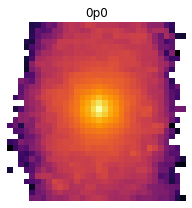

68286


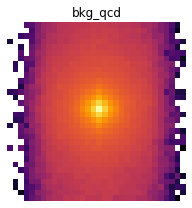

In [7]:
def plt_jet_img(jet_image):
    fig = plt.figure(figsize=(3,3))
    jet_image /= np.sum(jet_image)
    img = plt.imshow(jet_image, norm=LogNorm(), interpolation="nearest", origin="lower")
    img.set_cmap('inferno')
    #plt.colorbar(img)
    plt.axis('off')
    plt.title(jet_type)
    plt.tight_layout()
    plt.savefig(path.parent / "figures" / "jet_images" / f"{jet_type}.pdf")
    plt.savefig(path.parent / "figures" / "jet_images" / f"{jet_type}.png")
    plt.show()
    
    
jet_types = ["0p0", "0p3", "1p0", "bkg_qcd"]
for jet_type in jet_types:
    jet_img_path = path.parent / "data" / "jet_images" / jet_type
    jet0 = np.zeros((32,32))
    jet_size = 0
    for jet_img_file in pathlib.Path(jet_img_path).rglob("*.h5"):
        jet_img = h5py.File(jet_img_file, "r")["features"][:]
        jet_size += jet_img.shape[0]
        jet0 += np.sum(jet_img, axis=0)
        if jet_size > 40000:
            print(jet_size)
            plt_jet_img(jet0)
            break